In [4]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l



In [5]:
max_degree = 20
n_train , n_test = 100 , 100
true_w = np.zeros( max_degree )
true_w[0:4] = np.array( [ 5 , 1.2 , -3.4 , 5.6])

features  = np.random.normal( size = ( n_train+n_test , 1 ))
np.random.shuffle( features )
poly_features = np.power( features , np.arange( max_degree).reshape(1,-1))#设置成一行的二维向量
for  i  in range( max_degree ):
    poly_features[:, i ] /= math.gamma( i + 1 )

labels = np.dot( poly_features , true_w )
labels += np.random.normal( scale=0.1 , size= labels.shape )
labels

array([-3.61314358e+00,  4.57427755e+00,  4.19398733e+00,  5.25102632e+00,
        5.39864394e+00,  5.36754317e+00, -2.01379464e+00,  5.23786189e+00,
       -8.32745428e+00,  6.00729337e+00,  5.46410455e+00,  4.28350781e+00,
        3.21027440e+00,  5.17418808e+00,  3.75034407e+00,  5.66576462e+00,
        5.41166939e+00,  4.85933337e+00,  4.42519639e+00,  6.39373275e+00,
        5.46770011e+00, -4.91286605e-01,  2.54903886e+00,  7.03685884e+00,
       -1.51827734e+00,  5.18706954e+00,  5.30852076e+00,  5.09259204e+00,
        5.68345871e+00,  5.29514423e+00,  2.86880531e+00,  7.23106011e+00,
       -3.32335457e-02,  4.94162407e+00,  5.17335740e+00,  5.66881371e+00,
        2.31980908e+00,  5.24976277e+00,  5.02962819e+00,  3.14356874e+00,
        5.56563721e+00, -1.64967098e+00,  5.77520280e+00,  5.25624727e+00,
        5.46850471e+00,  5.36509156e+00,  5.53292037e+00,  5.37363173e+00,
        9.19883364e+00,  5.65686460e+00,  2.14410718e+00, -3.64250754e-01,
        5.44012785e+00, -

In [6]:
# NumPy ndarray转换为tensor
true_w , features , poly_features , labels = [ torch.tensor( x , dtype=torch.float32) for x  in [ true_w , features , 
                                poly_features , labels] ] 
features[:2]


tensor([[-1.4927],
        [-0.2890]])

In [7]:
def evaluate_loss( net , data_iter , loss ):
    metric = d2l.Accumulator(2)#创造两个累积变量，存储总loss和总样本数量
    for x,y in data_iter:
        out = net(x) 
        y = y.reshape( out.shape )
        l = loss( out , y )
        metric.add( l.sum()  , l.numel() )
    return metric[0] / metric[1]

In [8]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式特征中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())


weight: [[ 4.99749    1.2026855 -3.4041967  5.6061063]]


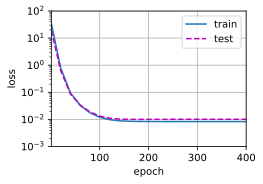

In [9]:
# 从多项式特征中选择前4个维度，即 1, x, x^2/2!, x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])


weight: [[2.725475 4.566055]]


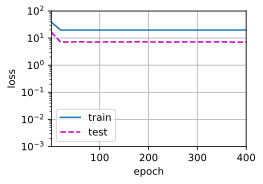

In [10]:
# 从多项式特征中选择前2个维度，即 1, x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])


weight: [[ 5.0054846   1.2500799  -3.4481006   5.3574405   0.12248787  0.76974213
   0.21125595 -0.27696285  0.13274291  0.14516489 -0.07849038 -0.01391564
   0.18351223  0.15047435 -0.19645987  0.08254357 -0.09512945 -0.15790819
   0.1098006   0.07553822]]


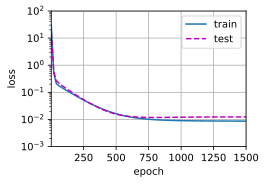

In [11]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)
